# Heart Disease Prediction

In [1]:
!gdown 1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN

Downloading...
From: https://drive.google.com/uc?id=1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN
To: c:\Project\AI VIET NAM\heart-disease-prediction\cleveland.csv

  0%|          | 0.00/10.9k [00:00<?, ?B/s]
100%|██████████| 10.9k/10.9k [00:00<?, ?B/s]


## Bài 1

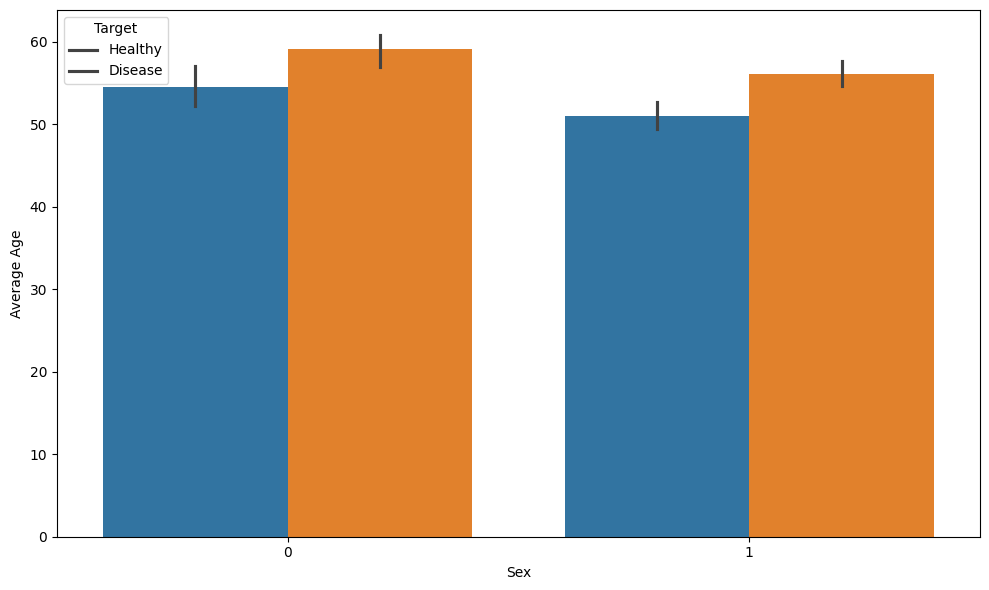

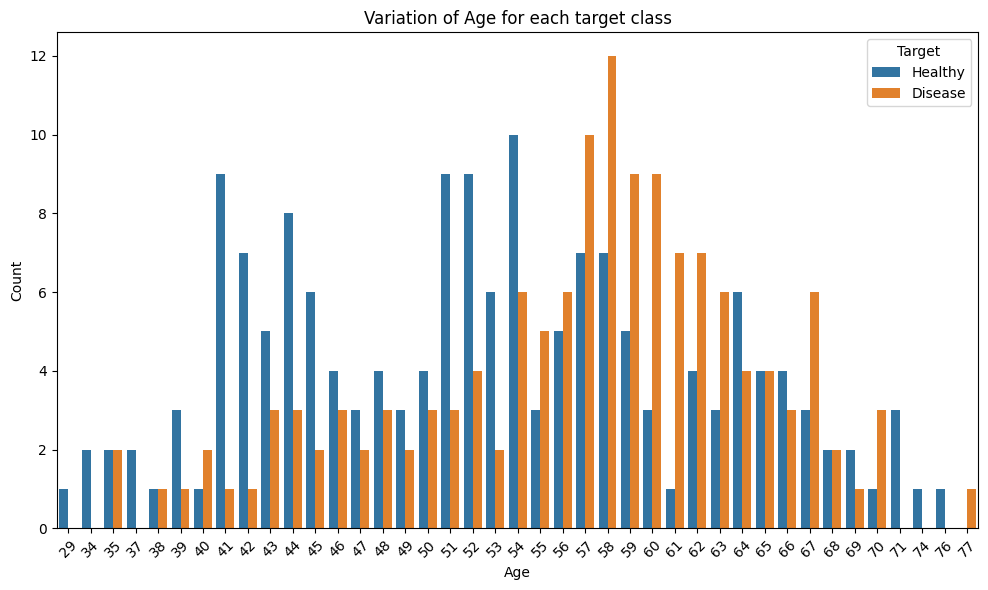

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleveland.csv", header=None)
df.columns = [
    "age",
    "sex",
    "cp",
    "trestbps",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "target",
]
df["target"] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df["thal"] = df.thal.fillna(df.thal.mean())
df["ca"] = df.ca.fillna(df.ca.mean())

plt.figure(figsize=(10, 6))
sns.barplot(x="sex", y="age", hue="target", data=df)
plt.xlabel("Sex")
plt.ylabel("Average Age")
plt.legend(title="Target", labels=["Healthy", "Disease"])
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x="age", hue="target", data=df)
plt.title("Variation of Age for each target class")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Target", labels=["Healthy", "Disease"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# KNN

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(
    n_neighbors=5,
    weights="uniform",
    algorithm="auto",
    leaf_size=30,
    p=2,
    metric="minkowski",
)

knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(
    "Accuracy for training set for KNeighborsClassifier = {}".format(accuracy_for_train)
)
print("Accuracy for test set for KNeighborsClassifier = {}".format(accuracy_for_test))

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


## SVM

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

svm_model = SVC(kernel="rbf", random_state=42)

svm_model.fit(X_train, y_train)

y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(
    "Accuracy for training set for SVM = {}".format(accuracy_for_train)
)
print("Accuracy for test set for SVM = {}".format(accuracy_for_test))

Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


## Naive Bayes

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pandas as pd

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for Naive Bayes = {}".format(accuracy_for_train))
print("Accuracy for test set for Naive Bayes = {}".format(accuracy_for_test))

Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


## Decision Tree

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt_model = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_split=2)
dt_model.fit(X_train, y_train)

y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for Decision Tree = {}".format(accuracy_for_train))
print("Accuracy for test set for Decision Tree = {}".format(accuracy_for_test))

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.72


## Random Forest

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestClassifier(criterion="gini", max_depth=10, min_samples_split=2, n_estimators = 10)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for Random Forest = {}".format(accuracy_for_train))
print("Accuracy for test set for Random Forest = {}".format(accuracy_for_test))

Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.82


## Adaboost

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

ad_model = AdaBoostClassifier(
    learning_rate=1.0, n_estimators=50
)
ad_model.fit(X_train, y_train)

y_pred_train = ad_model.predict(X_train)
y_pred_test = ad_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for Random Forest = {}".format(accuracy_for_train))
print("Accuracy for test set for Random Forest = {}".format(accuracy_for_test))

Accuracy for training set for Random Forest = 0.91
Accuracy for test set for Random Forest = 0.84


c:\Users\vanna\.conda\envs\.env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## GradientBoost

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    min_samples_split=2,
    max_depth=3,
    random_state=42,
)
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for Random Forest = {}".format(accuracy_for_train))
print("Accuracy for test set for Random Forest = {}".format(accuracy_for_test))

Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.85


## XGBoost

In [54]:
from sklearn.model_selection import train_test_split
from xgboost import  XGBClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xg_model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    min_samples_split=2,
    max_depth=3,
    random_state=42,
)
xg_model.fit(X_train, y_train)

y_pred_train = xg_model.predict(X_train)
y_pred_test = xg_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for Random Forest = {}".format(accuracy_for_train))
print("Accuracy for test set for Random Forest = {}".format(accuracy_for_test))

Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.85


## Stacking

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    StackingClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(XGBClassifier)

gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel="rbf", random_state=42)
ad = AdaBoostClassifier(random_state=42)

base_learners = [
    ("dtc", dtc),
    ("rfc", rfc),
    ("knn", knn),
    ("svc", svc),
    ("gbc", gc),
    ("abc", ad),
]

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=GradientBoostingClassifier(random_state=42),
)

stack_model.fit(X_train, y_train)


accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for Stacking = {}".format(accuracy_for_train))
print("Accuracy for test set for Stacking = {}".format(accuracy_for_test))

c:\Users\vanna\.conda\envs\.env\Lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\vanna\.conda\envs\.env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\vanna\.conda\envs\.env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\vanna\.conda\envs\.env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\vanna\.conda\envs\.env\Lib\site-packages\sklearn\ensemble\_weight_boostin

Accuracy for training set for Stacking = 0.98
Accuracy for test set for Stacking = 0.85


c:\Users\vanna\.conda\envs\.env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
